**Description**: Analyze accuracies for $m = 50, n = 200$.

**Estimated runtime**: ~2 hours. (Multi-core isn't working on my machine. Set `cores=4`
in the `model.fit` call if it works for you.)

In [1]:
import os
import sys
from typing import Literal

import seaborn as sns

# sys hack to import from grandparent
sys.path.append(os.path.abspath(os.path.join('..', '..')))
import utils

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
num_train: Literal[50, 100] = 50
num_test: Literal[50, 100, 200, 500] = 200

In [3]:
sns.set_theme(style="darkgrid")

# Load data

In [4]:
accuracies_home_dir = os.path.join("..", "..", "accuracies_from_paper")
accuracy_df = utils.load_all_accuracies(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for plot
num_correct_df = utils.load_all_num_correct(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for model

In [5]:
equation = "p(num_correct, num_test) ~ method + lm_type + (1|dataset/method) + (1|dataset/pair)"
id_vars = ["num_test", "pair", "lm_type", "dataset"]

# Plot

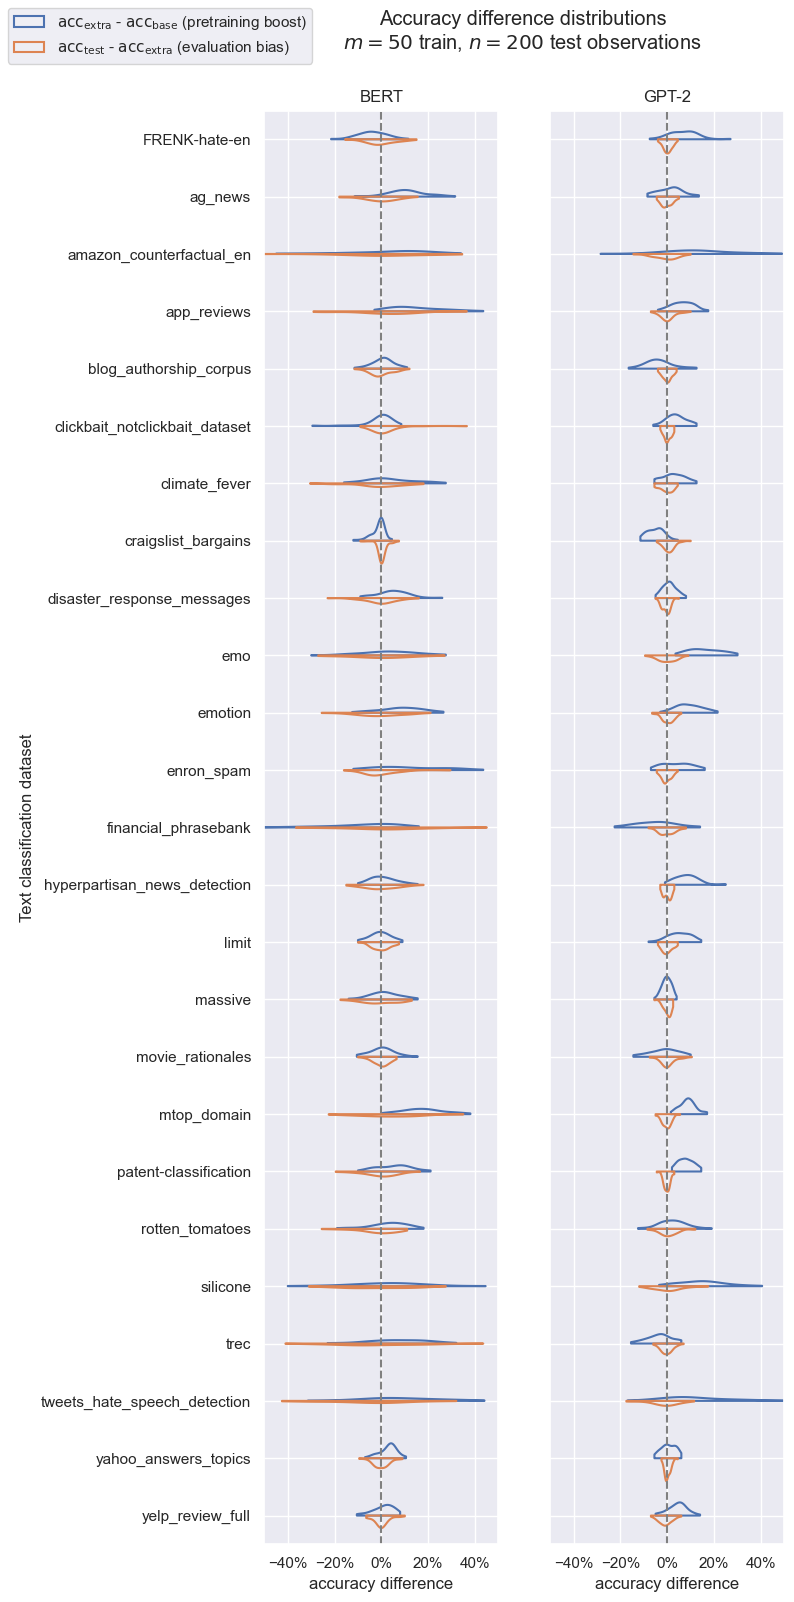

In [6]:
utils.violin_plot_multiple_lms(accuracy_df, num_test, num_train)

# Control

In [7]:
summary_control, summary_relative_control = utils.eda(
    accuracy_df, treatment="extra", control="base"
)

Overall difference:
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.041472 ┆ 0.009387 │
└──────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.226085 ┆ 0.061191 │
└──────────┴──────────┘


In [8]:
summary_control

dataset,mean,se
"""FRENK-hate-en""",0.0148,0.011473
"""ag_news""",0.0607,0.011822
"""amazon_counter…",0.08235,0.024264
"""app_reviews""",0.1043,0.013154
"""blog_authorshi…",-0.01475,0.008178
…,…,…
"""silicone""",0.08515,0.020418
"""trec""",0.02,0.015501
"""tweets_hate_sp…",0.10225,0.021577
"""yahoo_answers_…",0.01755,0.005065


In [9]:
summary_relative_control

dataset,mean,se
"""FRENK-hate-en""",0.044675,0.022722
"""ag_news""",0.121846,0.025302
"""amazon_counter…",0.194501,0.053531
"""app_reviews""",0.804704,0.114815
"""blog_authorshi…",-0.022265,0.015686
…,…,…
"""silicone""",0.306946,0.062888
"""trec""",0.112275,0.06396
"""tweets_hate_sp…",0.242254,0.055469
"""yahoo_answers_…",0.232303,0.055575


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, lm_type, 1|dataset_sigma, 1|dataset_offset, 1|dataset:method_sigma, 1|dataset:method_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 1571 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Sampling posterior predictive. This will take at least 30 min. This issue tracks a progress bar feature: https://github.com/bambinos/bambi/issues/818


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|dataset:method[FRENK-hate-en:base],0.09207,0.13891,-0.12231,0.31871,0.00292,0.00206,2266.71685,2722.81068,1.00177
1|dataset:method[FRENK-hate-en:extra],-0.08224,0.13979,-0.31057,0.12925,0.00295,0.00212,2249.94462,2733.69444,1.00299
1|dataset:method[ag_news:base],-0.01497,0.14038,-0.22652,0.21128,0.00265,0.00248,2882.37657,2114.44258,1.00134
1|dataset:method[ag_news:extra],0.02809,0.14251,-0.18921,0.25434,0.00277,0.00242,2702.80464,2010.90537,1.00226
1|dataset:method[amazon_counterfactual_en:base],-0.05938,0.14247,-0.26560,0.18384,0.00276,0.00233,2676.48556,2346.47865,1.00129
1|dataset:method[amazon_counterfactual_en:extra],0.09465,0.14279,-0.13261,0.31616,0.00272,0.00223,2743.19760,2368.08674,1.00060
1|dataset:method[app_reviews:base],-0.23884,0.14140,-0.45230,-0.00980,0.00270,0.00191,2754.43259,2941.61089,1.00009
1|dataset:method[app_reviews:extra],0.20307,0.14027,-0.00266,0.42988,0.00262,0.00190,2877.80264,2957.81439,1.00102
1|dataset:method[blog_authorship_corpus:base],0.15084,0.14279,-0.07986,0.37165,0.00282,0.00210,2565.60642,2295.57666,1.00193
1|dataset:method[blog_authorship_corpus:extra],-0.14000,0.14196,-0.38030,0.07475,0.00283,0.00208,2515.62346,2215.18393,1.00244


/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (52), generating only 20 plots
  warnings.warn(


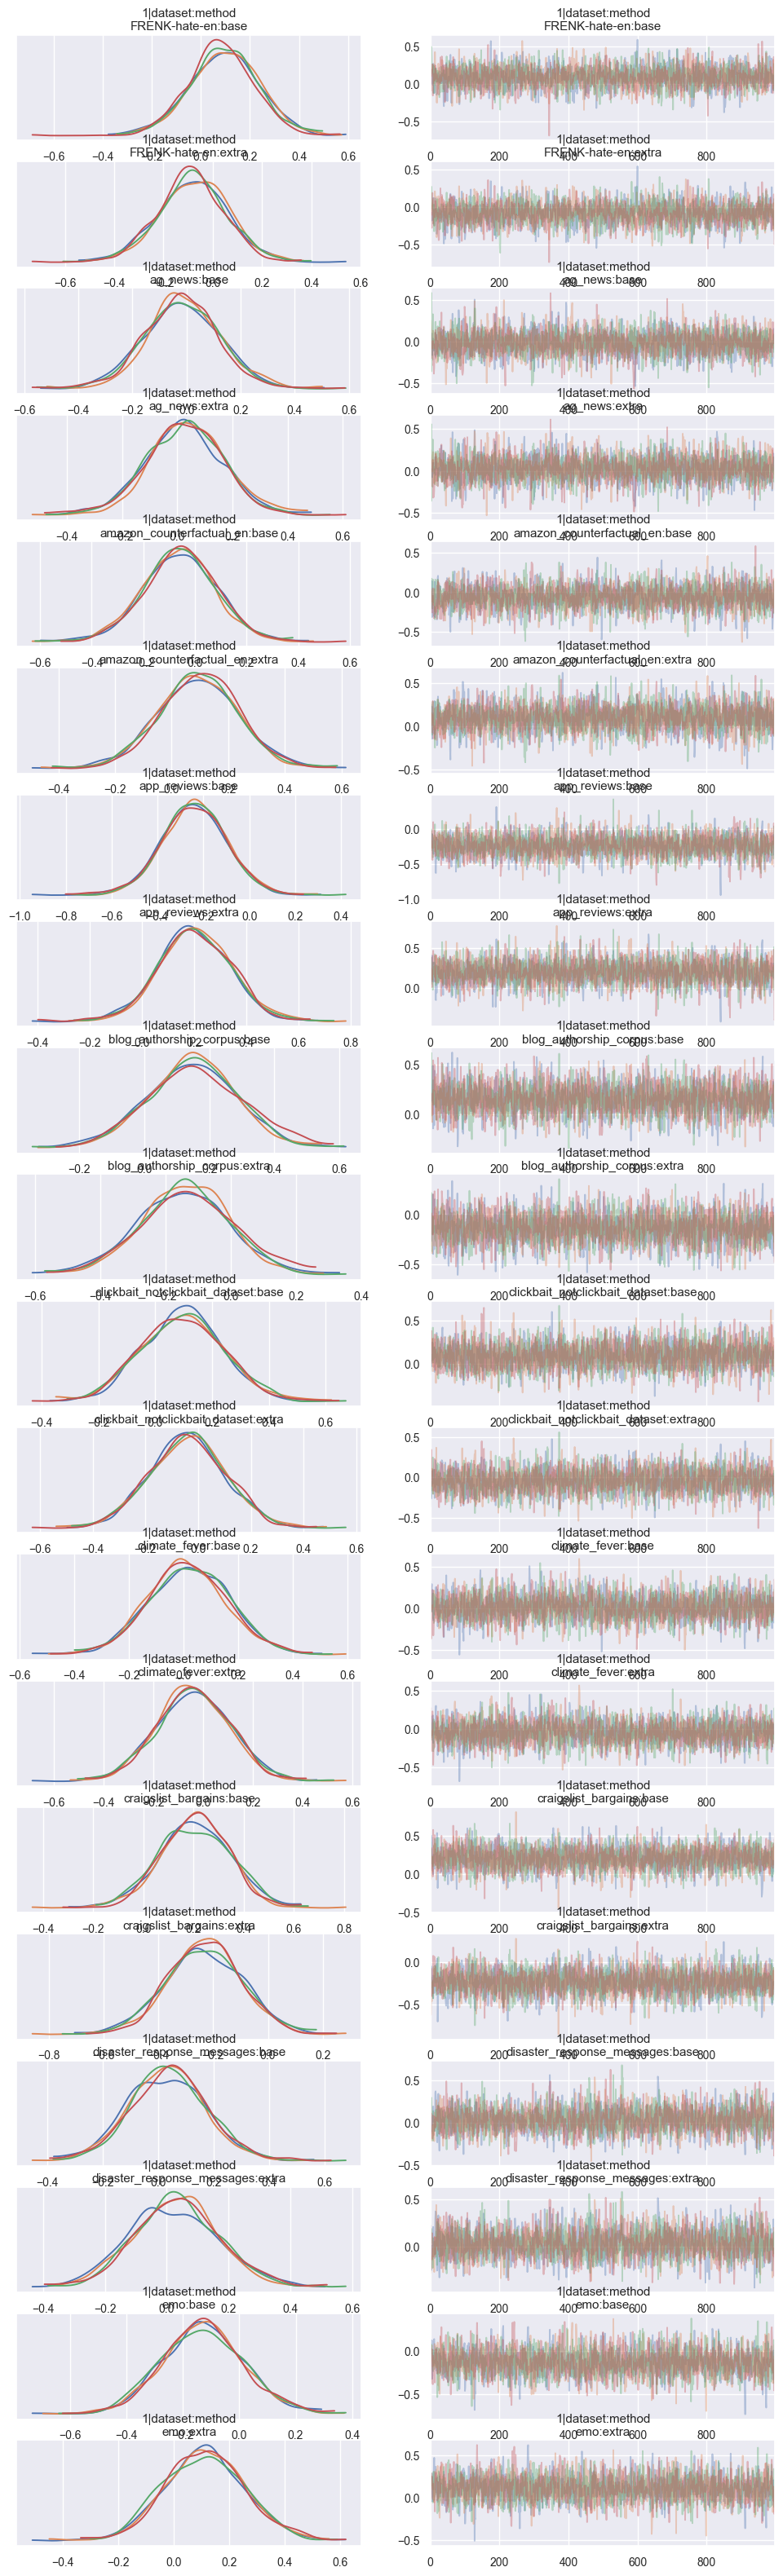

In [10]:
model_control, summary_control, az_summary_control = utils.stat_model(
    num_correct_df,
    treatment="extra",
    control="base",
    equation=equation,
    id_vars=id_vars,
)

In [11]:
print(model_control)

       Formula: p(num_correct, num_test) ~ method + lm_type + (1|dataset/method) + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 5000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
            lm_type ~ Normal(mu: 0.0, sigma: 5.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:method ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 3.5355))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Treatment

In [12]:
summary_bias, summary_relative_bias = utils.eda(
    accuracy_df, treatment="test", control="extra"
)

Overall difference:
┌───────────┬──────────┐
│ mean      ┆ se       │
╞═══════════╪══════════╡
│ -0.002154 ┆ 0.001806 │
└───────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.029909 ┆ 0.009393 │
└──────────┴──────────┘


In [13]:
summary_bias

dataset,mean,se
"""FRENK-hate-en""",0.00165,0.006701
"""ag_news""",-0.0041,0.007698
"""amazon_counter…",-0.00355,0.02154
"""app_reviews""",0.0052,0.014507
"""blog_authorshi…",-0.00005,0.005065
…,…,…
"""silicone""",-0.00895,0.015347
"""trec""",-0.0096,0.018099
"""tweets_hate_sp…",-0.03615,0.018541
"""yahoo_answers_…",0.0005,0.003619


In [14]:
summary_relative_bias

dataset,mean,se
"""FRENK-hate-en""",0.006032,0.012286
"""ag_news""",-0.005206,0.012621
"""amazon_counter…",0.032205,0.042828
"""app_reviews""",0.111007,0.077644
"""blog_authorshi…",0.002339,0.010071
…,…,…
"""silicone""",0.01292,0.038021
"""trec""",0.149942,0.18716
"""tweets_hate_sp…",-0.034597,0.0307
"""yahoo_answers_…",0.031604,0.031039


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, lm_type, 1|dataset_sigma, 1|dataset_offset, 1|dataset:method_sigma, 1|dataset:method_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 1254 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Sampling posterior predictive. This will take at least 30 min. This issue tracks a progress bar feature: https://github.com/bambinos/bambi/issues/818


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|dataset:method[FRENK-hate-en:extra],-0.00752,0.02329,-0.04576,0.02774,0.00036,0.00032,4115.30471,3203.44959,1.00058
1|dataset:method[FRENK-hate-en:test],0.00849,0.02362,-0.02865,0.04509,0.00037,0.00033,4116.96949,3167.83623,1.00093
1|dataset:method[ag_news:extra],0.00368,0.02366,-0.03618,0.03862,0.00033,0.00035,5033.84761,3271.12116,1.00063
1|dataset:method[ag_news:test],-0.00281,0.02369,-0.04027,0.03490,0.00033,0.00034,5181.64294,3158.94638,0.99955
1|dataset:method[amazon_counterfactual_en:extra],0.00273,0.02400,-0.03406,0.04248,0.00034,0.00036,4909.12347,3324.71262,1.00023
1|dataset:method[amazon_counterfactual_en:test],-0.00169,0.02447,-0.03719,0.03907,0.00034,0.00038,5233.29777,3172.89231,1.00134
1|dataset:method[app_reviews:extra],-0.01451,0.02308,-0.05146,0.02110,0.00033,0.00028,5008.50406,3505.94829,0.99987
1|dataset:method[app_reviews:test],0.01407,0.02311,-0.01983,0.05303,0.00037,0.00030,4063.00950,3221.39932,1.00067
1|dataset:method[blog_authorship_corpus:extra],-0.00474,0.02345,-0.04159,0.03224,0.00035,0.00033,4438.32423,3166.39074,1.00119
1|dataset:method[blog_authorship_corpus:test],0.00408,0.02321,-0.03205,0.04233,0.00036,0.00032,4175.57106,3171.02957,1.00044


/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (52), generating only 20 plots
  warnings.warn(


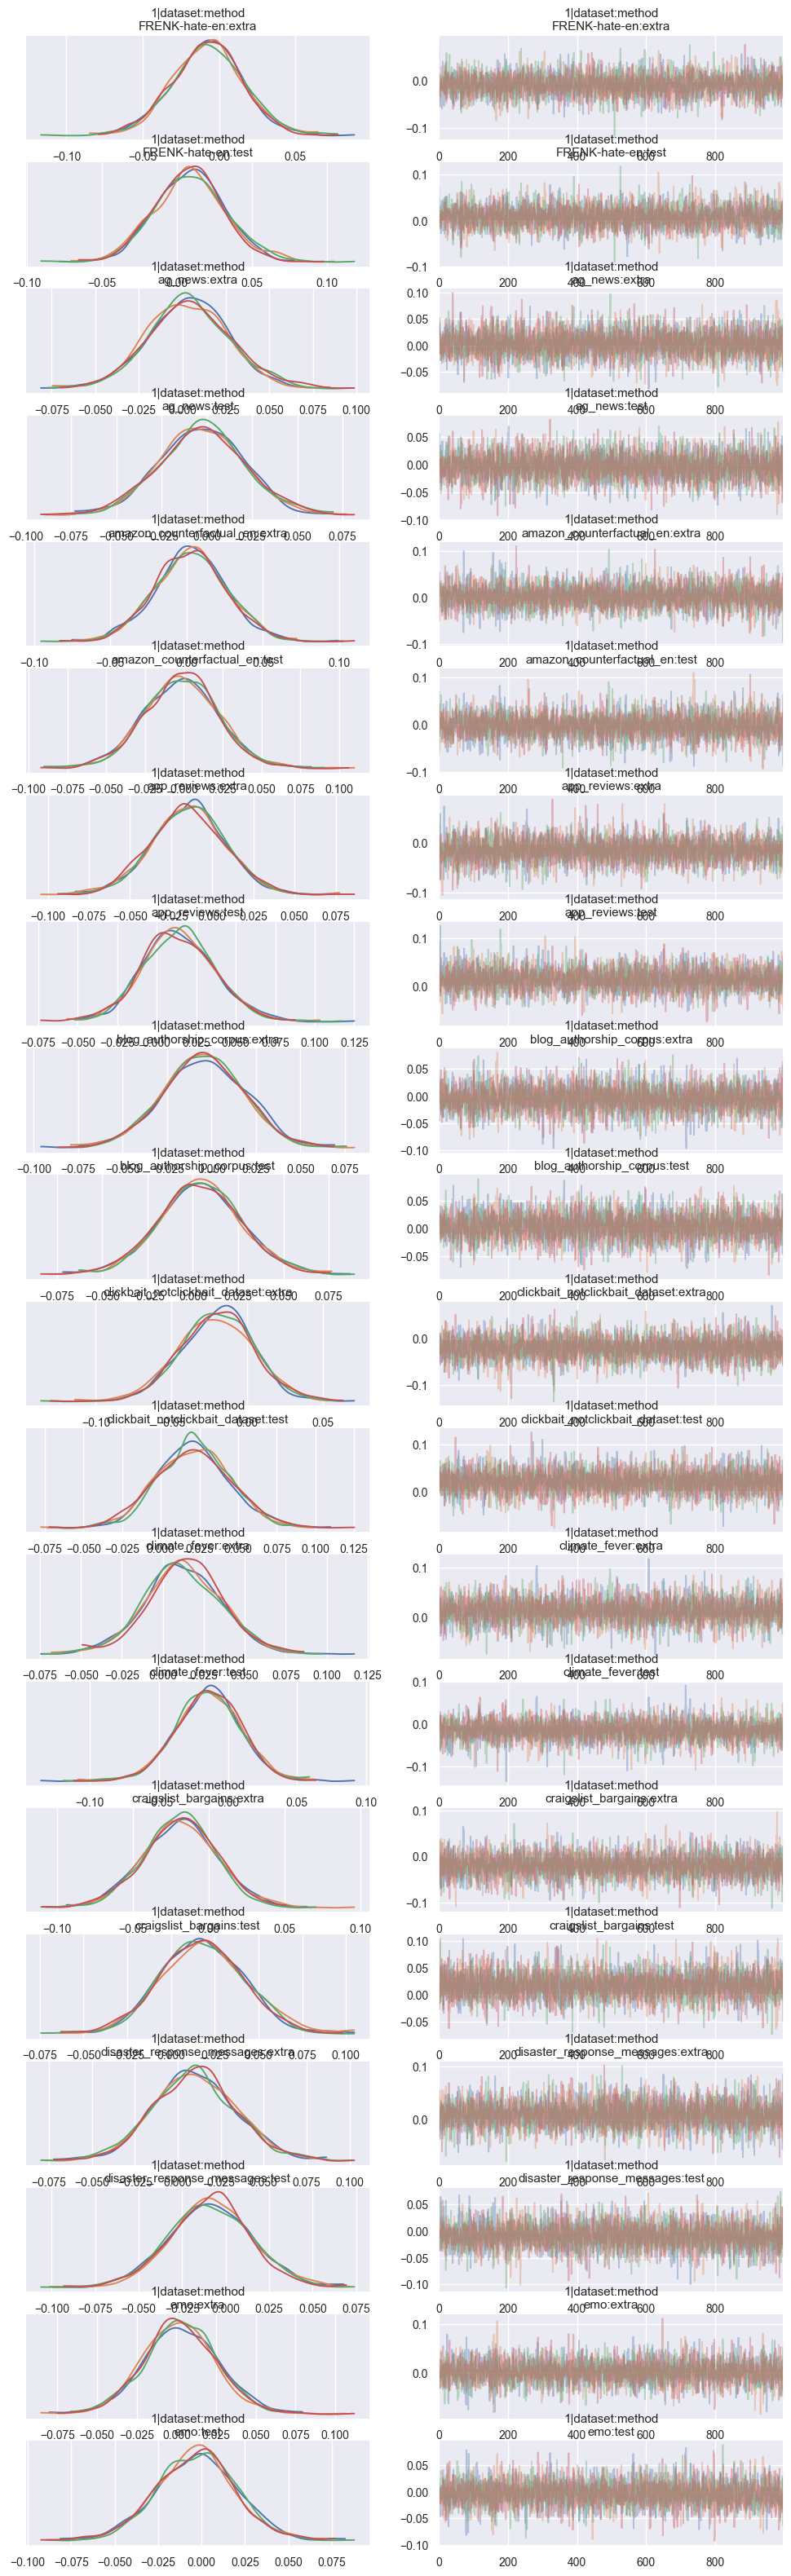

In [15]:
model_bias, summary_bias, az_summary_bias = utils.stat_model(
    num_correct_df,
    treatment="test",
    control="extra",
    equation=equation,
    id_vars=id_vars,
)

In [16]:
print(model_bias)

       Formula: p(num_correct, num_test) ~ method + lm_type + (1|dataset/method) + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 5000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
            lm_type ~ Normal(mu: 0.0, sigma: 5.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:method ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 3.5355))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Write inference data

In [17]:
netcdfs = os.path.join("..", "..", "netcdfs", f"m{num_train}")
if not os.path.exists(netcdfs):
    os.mkdir(netcdfs)

In [18]:
summary_control.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_control.nc")
)

'../../netcdfs/m50/main_m50_n200_control.nc'

In [19]:
summary_bias.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_treatment.nc")
)

'../../netcdfs/m50/main_m50_n200_treatment.nc'